# Représentations graphiques

**Auhtor** : Laetitia Carli

**Date** : June 2025

## 1. Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
from matplotlib.colors import LinearSegmentedColormap

## 2. Data import

In [2]:
df = pd.read_csv("questionnaire_dataset.csv", encoding='utf-8')
df

Horodateur Âge (en chiffre) Genre   \
0    04/06/2025 16:15:10               19  Femme   
1    04/06/2025 17:16:08               18  Femme   
2    04/06/2025 17:53:57               19  Femme   
3    12/06/2025 13:59:40               16  Femme   
4    12/06/2025 13:59:55               20  Femme   
..                   ...              ...    ...   
251  17/06/2025 08:18:48               17  Homme   
252  17/06/2025 09:37:34               20  Femme   
253  17/06/2025 10:19:54               21  Femme   
254  18/06/2025 13:13:12               19  Femme   
255  18/06/2025 23:03:37               47  Femme   

    À quelle fréquence avez-vous des sentiments de déjà-vu ?   \
0                                              Souvent          
1                                         Très souvent          
2                                              Souvent          
3                                             Rarement          
4                                              Souvent          
..                                                 ...          
251                                       Très souvent          
252                                           Rarement          
253                                            Souvent          
254                                           Rarement          
255                                            Souvent          

    A quelle fréquence faites-vous des cauchemars ?  \
0                                    Je ne sais pas   
1                                          Rarement   
2                                          Rarement   
3                                          Rarement   
4                                          Rarement   
..                                              ...   
251                                        Rarement   
252                                        Rarement   
253                                         Souvent   
254                                        Rarement   
255                                        Rarement   

    Les rêves sont une expérience que j'apprécie.   \
0                                           Neutre   
1                                         D'accord   
2                                         D'accord   
3                                         D'accord   
4                              Totalement d'accord   
..                                             ...   
251                                         Neutre   
252                                       D'accord   
253                                       D'accord   
254                                       D'accord   
255                                       D'accord   

    Rêvez-vous en couleur ou en noir et blanc ?  \
0                                Je ne sais pas   
1                                    En couleur   
2                                    En couleur   
3                                    En couleur   
4                                    En couleur   
..                                          ...   
251                                    Les deux   
252                                         NaN   
253                                  En couleur   
254                                  En couleur   
255                                  En couleur   

    Mes rêves ont déjà influencé mes actions.  \
0                                    D'accord   
1                                      Neutre   
2                                    D'accord   
3                                Pas d'accord   
4                         Totalement d'accord   
..                                        ...   
251                                  D'accord   
252                                    Neutre   
253                                  D'accord   
254                                  D'accord   
255                                  D'accord   

    Je me souviens souvent de mes rêves.  \
0                   Pas du tout d'accord   
1       

## 3. Data manipulation

### 3.1 Rename columns

In [3]:
df = df.rename(columns={'Âge (en chiffre)': 'Age'})
df = df.rename(columns={'Genre ': 'Genre'})
df = df.rename(columns={'Les rêves sont une expérience que j\'apprécie. ': 'appreciation'})
df = df.rename(columns={'Je cherche la signification de mes rêves. ': 'signification'})
df = df.rename(columns={'A quelle fréquence faites-vous des cauchemars ?': 'cauchemars'})
df = df.rename(columns={'Je me souviens souvent de mes rêves.': 'souvenirs'})
df = df.rename(columns={'Je fais des rêves lucides.': 'lucide'})
df = df.rename(columns={'J\'ai des expériences de paralysie du sommeil. ': 'paralysie'})
df = df.rename(columns={'J\'ai des expériences de somnambulisme. ': 'somnambulisme'})
df = df.rename(columns={'Rêvez-vous en couleur ou en noir et blanc ?': 'couleur'})
df = df.rename(columns={'À quelle fréquence avez-vous des sentiments de déjà-vu ? ': 'deja_vu'})
df = df.rename(columns={'J\'ai déjà eu le sentiment que mes rêves étaient prémonitoires.': 'premonitoire'})
df = df.rename(columns={'Mes rêves ont déjà influencé mes actions.': 'influence'})

### 3.2 Clean the data

In [4]:
age_dict = {"20 ans" : 20,
       "55 ans" : 55,
       "soixante deux ans" : 62,
       "18 ans": 18
              }
df['Age'] = df['Age'].astype(str).str.strip().str.lower()
df.loc[:, 'Age'] = df['Age'].replace(age_dict)

In [5]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

In [6]:
df = df[df['Genre'] != "Je ne souhaite pas répondre"]

In [36]:
df.loc[:,'cauchemars'] = df['cauchemars'].replace({'Tout les jours': 'Tous les jours'})

In [19]:
df.loc[:,'couleur'] = df['couleur'].replace({'Je ne sais pas': 'Ne sait pas'})
df.loc[:,'cauchemars'] = df['cauchemars'].replace({'Je ne sais pas': 'Ne sait pas'})

In [32]:
df.loc[:,'premonitoire'] = df['premonitoire'].replace({'Pas du tout d\'accord': "Pas du tout\nd'accord"})
df.loc[:,'influence'] = df['influence'].replace({'Pas du tout d\'accord': "Pas du tout\nd'accord"})
df.loc[:,'premonitoire'] = df['premonitoire'].replace({"Totalement d'accord": "Totalement\nd'accord"})
df.loc[:,'influence'] = df['influence'].replace({"Totalement d'accord": "Totalement\nd'accord"})
df.loc[:,'appreciation'] = df['appreciation'].replace({"Totalement d'accord": "Totalement\nd'accord"})
df.loc[:,'souvenirs'] = df['souvenirs'].replace({"Totalement d'accord": "Totalement\nd'accord"})
df.loc[:,'souvenirs'] = df['souvenirs'].replace({'Pas du tout d\'accord': "Pas du tout\nd'accord"})

## 4. Data description

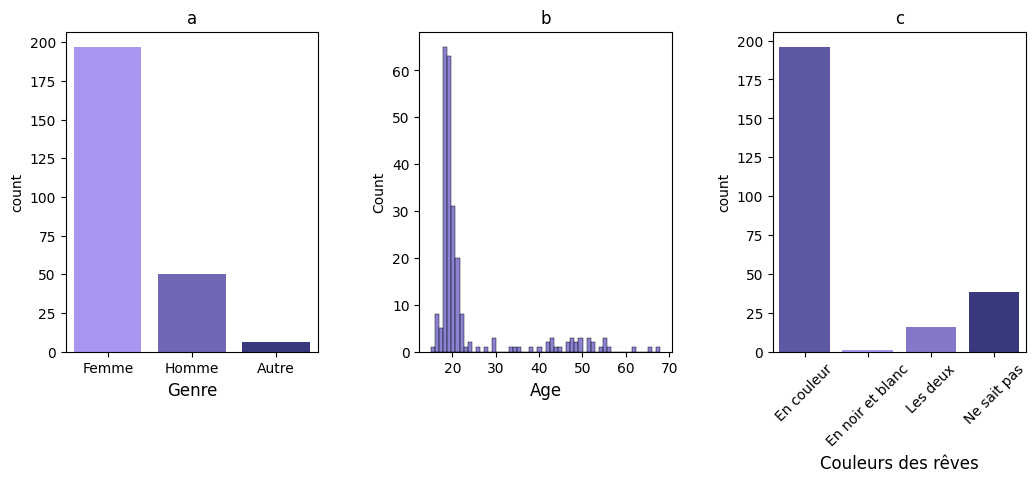

In [10]:
color_start = '#9f87ff'
color_end = '#2c2d89'

# Conversion des couleurs hexadécimales en valeurs RGB
rgb_start = tuple(int(color_start.lstrip('#')[i:i+2], 16) / 255.0 for i in (0, 2, 4))
rgb_end = tuple(int(color_end.lstrip('#')[i:i+2], 16) / 255.0 for i in (0, 2, 4))

# Création du dégradé de couleur
cmap = LinearSegmentedColormap.from_list("custom", [rgb_start, rgb_end])

# Création de la figure avec 3 sous-figures
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Comptage du nombre de genres uniques
n_genre = df['Genre'].nunique()
palette_genre = [cmap(i) for i in np.linspace(0, 1, n_genre)]

# Tracé du comptage des genres
sns.countplot(x='Genre', hue = 'Genre', data=df, ax=axs[0], palette=palette_genre, legend = False)
axs[0].set_xlabel("Genre", fontsize=12)
axs[0].set_title("a")

# Tracé de l'histogramme des âges
sns.histplot(x=df['Age'], ax=axs[1], color=cmap(0.5))
axs[1].set_xlabel("Age", fontsize=12)
axs[1].set_title("b")

# Comptage du nombre de couleurs uniques
couleur_order = ["En couleur", "En noir et blanc", "Les deux", "Ne sait pas"]
palette_couleur = [cmap(i) for i in np.linspace(0, 1, len(couleur_order))][::-1]

# Tracé du comptage des couleurs
sns.countplot(x='couleur', hue = 'couleur', data=df, order=couleur_order, ax=axs[2], palette=palette_couleur, legend = False)
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_xlabel("Couleurs des rêves", fontsize=12)
axs[2].set_title("c")

# Mise en page de la figure
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

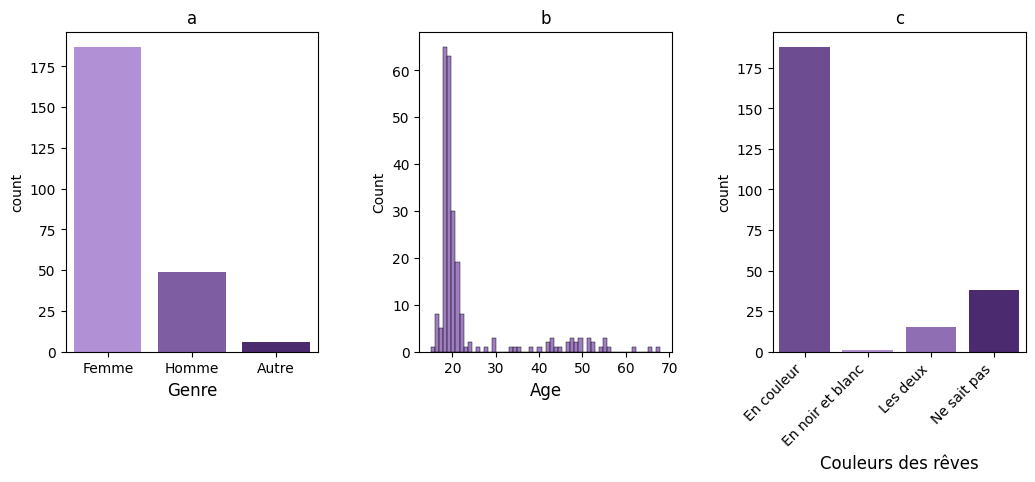

In [27]:
#Panel 1 : genre, âge et couleur
df.dropna(subset = ['Age', 'Genre', 'couleur'], inplace=True)
h = 0.75
s = 0.6
l_min = 0.3
l_max = 0.7

rgb_min = colorsys.hls_to_rgb(h, l_min, s)
rgb_max = colorsys.hls_to_rgb(h, l_max, s)

# Création du dégradé de couleur
cmap = LinearSegmentedColormap.from_list("custom", [rgb_max, rgb_min])


fig, axs = plt.subplots(1, 3, figsize=(12, 4))

n_genre = df['Genre'].nunique()
palette_genre = [cmap(i) for i in np.linspace(0, 1, n_genre)]

sns.countplot(x='Genre', hue='Genre', data=df, ax=axs[0], palette=palette_genre, legend=False)
axs[0].set_xlabel("Genre", fontsize=12)
axs[0].set_title("a")

sns.histplot(x=df['Age'], ax=axs[1], color=cmap(0.5))
axs[1].set_xlabel("Age", fontsize=12)
axs[1].set_title("b")

couleur_order = ["En couleur", "En noir et blanc", "Les deux", "Ne sait pas"]
palette_couleur = [cmap(i) for i in np.linspace(0, 1, len(couleur_order))][::-1]

sns.countplot(x='couleur', hue='couleur', data=df, order=couleur_order, ax=axs[2], palette=palette_couleur, legend=False)
for tick in axs[2].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[2].set_xlabel("Couleurs des rêves", fontsize=12)
axs[2].set_title("c")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()



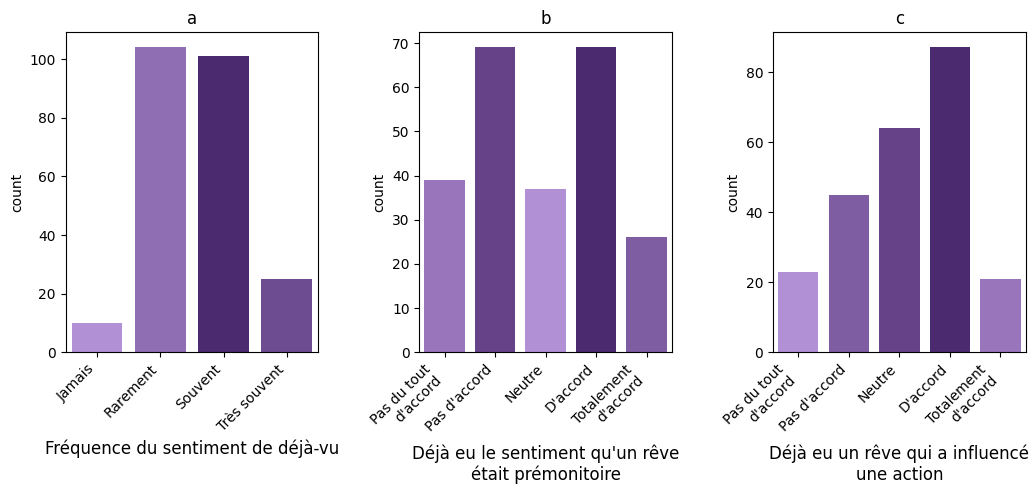

In [28]:
#Panel 2 : déja-vu, prémonitoire, influence
df.dropna(subset = ['deja_vu', 'premonitoire', 'influence'], inplace=True)
h = 0.75
s = 0.6
l_min = 0.3
l_max = 0.7

rgb_min = colorsys.hls_to_rgb(h, l_min, s)
rgb_max = colorsys.hls_to_rgb(h, l_max, s)

# Création du dégradé de couleur
cmap = LinearSegmentedColormap.from_list("custom", [rgb_max, rgb_min])

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

deja_vu_order = ["Jamais", "Rarement", "Souvent", "Très souvent"]
palette_deja_vu = [cmap(i) for i in np.linspace(0, 1, len(deja_vu_order))][::-1]
sns.countplot(x='deja_vu', hue='deja_vu',order = deja_vu_order, data=df, ax=axs[0], palette=palette_deja_vu, legend=False)
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[0].set_xlabel("Fréquence du sentiment de déjà-vu", fontsize=12)
axs[0].set_title("a")

premonitoire_order = ["Pas du tout\nd'accord", "Pas d'accord", "Neutre", "D'accord", "Totalement\nd'accord"]
palette_premonitoire = [cmap(i) for i in np.linspace(0, 1, len(premonitoire_order))][::-1]
sns.countplot(x='premonitoire', hue='premonitoire', order = premonitoire_order, data=df, ax=axs[1], palette=palette_premonitoire, legend=False)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[1].set_xlabel("Déjà eu le sentiment qu'un rêve\nétait prémonitoire", fontsize=12)
axs[1].set_title("b")

influence_order = ["Pas du tout\nd'accord", "Pas d'accord", "Neutre", "D'accord", "Totalement\nd'accord"]
palette_influence = [cmap(i) for i in np.linspace(0, 1, len(influence_order))][::-1]
sns.countplot(x='influence', hue='influence', data=df, order=influence_order, ax=axs[2], palette=palette_influence, legend=False)
for tick in axs[2].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[2].set_xlabel("Déjà eu un rêve qui a influencé\nune action", fontsize=12)
axs[2].set_title("c")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

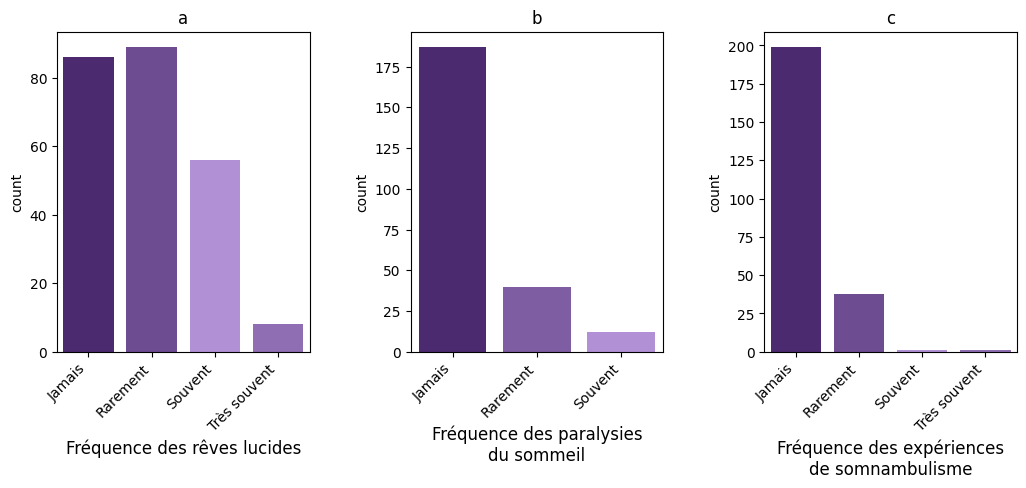

In [30]:
# panel 3: lucide, paralysie, somnambulisme
df.dropna(subset = ['lucide', 'paralysie', 'somnambulisme'], inplace=True)
h = 0.75
s = 0.6
l_min = 0.3
l_max = 0.7

rgb_min = colorsys.hls_to_rgb(h, l_min, s)
rgb_max = colorsys.hls_to_rgb(h, l_max, s)

# Création du dégradé de couleur
cmap = LinearSegmentedColormap.from_list("custom", [rgb_max, rgb_min])

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

lucide_order = ["Jamais", "Rarement", "Souvent", "Très souvent"]
palette_lucide = [cmap(i) for i in np.linspace(0, 1, len(lucide_order))][::-1]
sns.countplot(x='lucide', hue='lucide',order = lucide_order, data=df, ax=axs[0], palette=palette_lucide, legend=False)
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[0].set_xlabel("Fréquence des rêves lucides", fontsize=12)
axs[0].set_title("a")

paralysie_order = ["Jamais", "Rarement", "Souvent"]
palette_paralysie = [cmap(i) for i in np.linspace(0, 1, len(paralysie_order))][::-1]
sns.countplot(x='paralysie', hue='paralysie', order = paralysie_order, data=df, ax=axs[1], palette=palette_paralysie, legend=False)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[1].set_xlabel("Fréquence des paralysies\ndu sommeil", fontsize=12)
axs[1].set_title("b")

somnambulisme_order = ["Jamais", "Rarement", "Souvent", "Très souvent"]
palette_somnambulisme = [cmap(i) for i in np.linspace(0, 1, len(somnambulisme_order))][::-1]
sns.countplot(x='somnambulisme', hue='somnambulisme', data=df, order=somnambulisme_order, ax=axs[2], palette=palette_somnambulisme, legend=False)
for tick in axs[2].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[2].set_xlabel("Fréquence des expériences\nde somnambulisme", fontsize=12)
axs[2].set_title("c")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

In [34]:
df['cauchemars'].unique()

array(['Ne sait pas', 'Rarement', 'Tout les jours', 'Souvent', 'Jamais',
       'Tous les jours'], dtype=object)

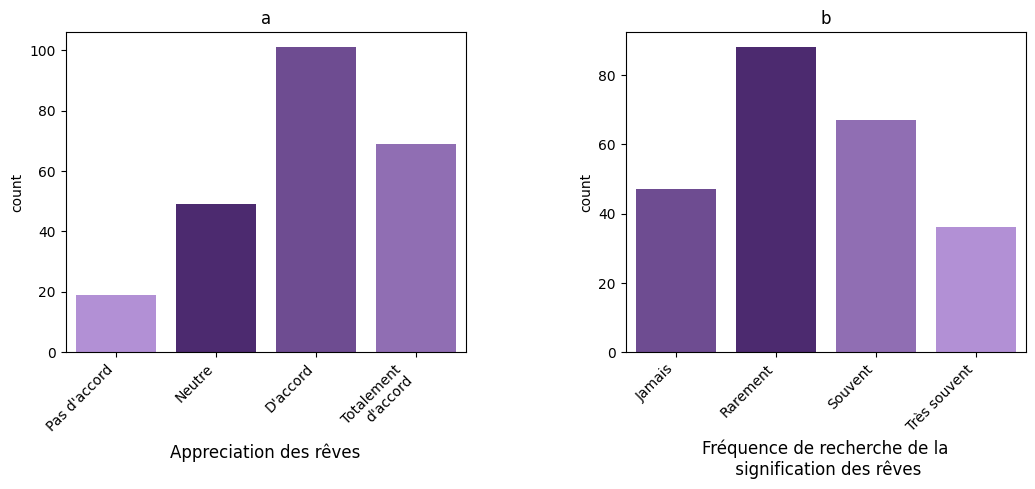

In [40]:
#Panel 4 : appreciation, signification, souvenirs, cauchemars
df.dropna(subset = ['appreciation', 'signification'], inplace=True)
h = 0.75
s = 0.6
l_min = 0.3
l_max = 0.7

rgb_min = colorsys.hls_to_rgb(h, l_min, s)
rgb_max = colorsys.hls_to_rgb(h, l_max, s)

# Création du dégradé de couleur
cmap = LinearSegmentedColormap.from_list("custom", [rgb_max, rgb_min])

fig, axs = plt.subplots(1,2 , figsize=(12, 4))

appreciation_order = ["Pas d'accord", "Neutre", "D'accord", "Totalement\nd'accord"]
palette_appreciation = [cmap(i) for i in np.linspace(0, 1, len(appreciation_order))][::-1]
sns.countplot(x='appreciation', hue='appreciation',order = appreciation_order, data=df, ax=axs[0], palette=palette_appreciation, legend=False)
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[0].set_xlabel("Appreciation des rêves", fontsize=12)
axs[0].set_title("a")

signification_order = ["Jamais", "Rarement", "Souvent", "Très souvent"]
palette_signification = [cmap(i) for i in np.linspace(0, 1, len(signification_order))][::-1]
sns.countplot(x='signification', hue='signification', order = signification_order, data=df, ax=axs[1], palette=palette_signification, legend=False)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[1].set_xlabel("Fréquence de recherche de la\n signification des rêves", fontsize=12)
axs[1].set_title("b")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

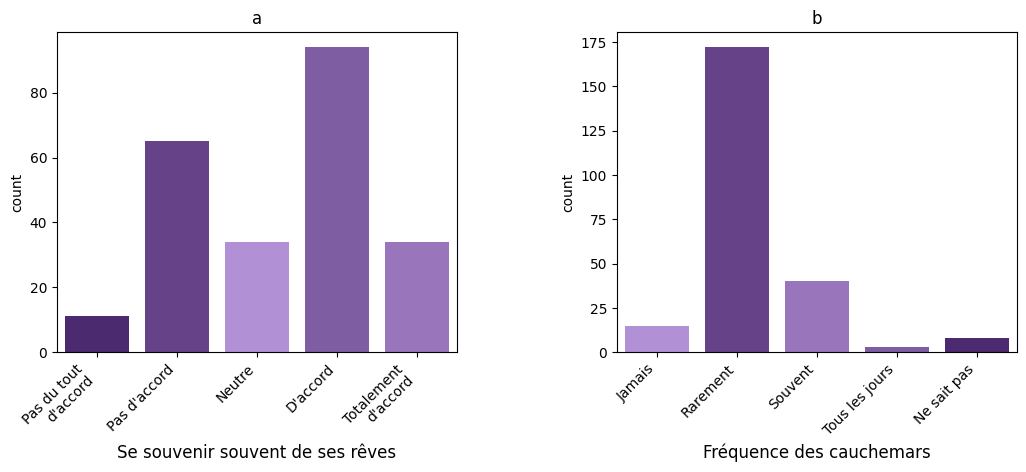

In [39]:
#Panel 5 : souvenirs et cauchemars
df.dropna(subset = ['souvenirs', 'cauchemars'], inplace=True)
h = 0.75
s = 0.6
l_min = 0.3
l_max = 0.7

rgb_min = colorsys.hls_to_rgb(h, l_min, s)
rgb_max = colorsys.hls_to_rgb(h, l_max, s)

# Création du dégradé de couleur
cmap = LinearSegmentedColormap.from_list("custom", [rgb_max, rgb_min])

fig, axs = plt.subplots(1,2 , figsize=(12, 4))

souvenirs_order =  ["Pas du tout\nd'accord", "Pas d'accord", "Neutre", "D'accord", "Totalement\nd'accord"]
palette_souvenirs = [cmap(i) for i in np.linspace(0, 1, len(souvenirs_order))][::-1]
sns.countplot(x='souvenirs', hue='souvenirs', data=df, order=souvenirs_order, ax=axs[0], palette=palette_souvenirs, legend=False)
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[0].set_xlabel("Se souvenir souvent de ses rêves", fontsize=12)
axs[0].set_title("a")

cauchemars_order =  ["Jamais", "Rarement", "Souvent", "Tous les jours", "Ne sait pas"]
palette_cauchemars = [cmap(i) for i in np.linspace(0, 1, len(cauchemars_order))][::-1]
sns.countplot(x='cauchemars', hue='cauchemars', data=df, order=cauchemars_order, ax=axs[1], palette=palette_cauchemars, legend=False)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[1].set_xlabel("Fréquence des cauchemars", fontsize=12)
axs[1].set_title("b")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()